In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn import metrics

In [14]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

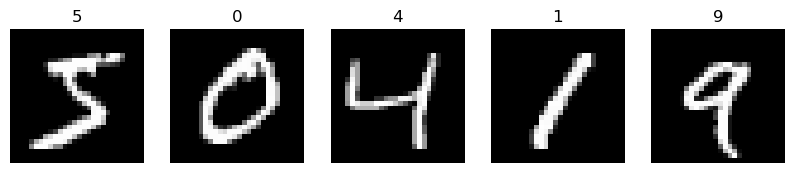

In [15]:
# Display the first five images in the training dataset
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()


In [16]:
# Compare the first five training labels
print("First five training labels:", train_labels[:5])

First five training labels: [5 0 4 1 9]


In [17]:
# Reshape and normalize the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [18]:
# Convert labels to categorical data
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 8s 9ms/step - loss: 0.1709 - accuracy: 0.9495
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0482 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0349 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0274 - accuracy: 0.9910
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0227 - accuracy: 0.9930


In [21]:
# Report the test accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.9908999800682068


313/313 [==============================] - 0s 1ms/step


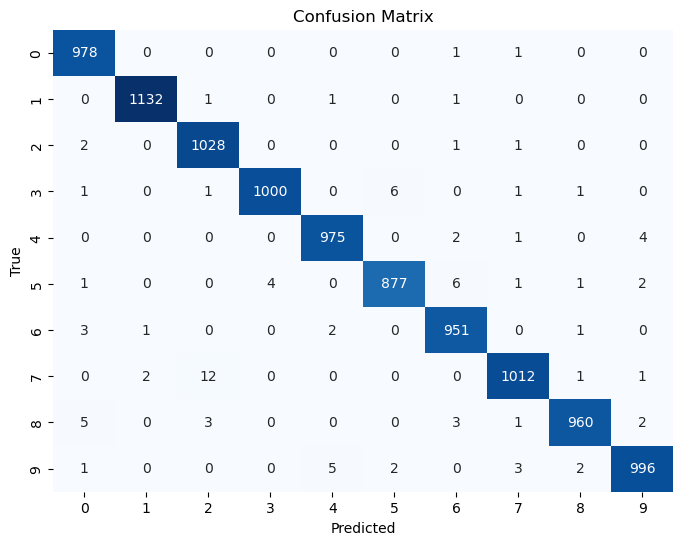

In [22]:
# Display confusion matrix
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)
test_labels = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In summary, the model demonstrated excellent performance on the given data, achieving near perfect accuracy and making correct predictions for 99% of each class. However, it's important to note that these findings are specific to the provided dataset, and the model's performance should be evaluated on a larger and more diverse dataset to assess its generalization capabilities.